Tujuan : Mengklasifikasikan minuman berdasarkan skor Nutri-Score. Nutri-Score adalah sistem label nutrisi yang mengklasifikasikan minuman dari A (terbaik) ke E (terburuk) berdasarkan nilai nutrisi per 100 ml, seperti kandungan energi, lemak, gula, garam, serat, dan protein.


**Dataset**
---

Pengumpulan data berdasarkan scraping dari situs Open Food Facts



In [207]:
import pandas as pd

url = "https://raw.githubusercontent.com/nabhylanr/ML-NutriScore/main/minuman.csv"
df = pd.read_csv(url)

df.head()

,Kategori,Nama_minuman,Nutri_Score,Energy (Per 100 ml),Fat (Per 100 ml),Saturated fat (Per 100 ml),Carbohydrates (Per 100 ml),Sugars (Per 100 ml),Fiber (Per 100 ml),Proteins (Per 100 ml),Salt (Per 100 ml)
0,fruit-juices,Cappy pulpy,e,155.0,0.0,0.0,9.0,7.0,NaN,0.0,0.050000
1,fruit-juices,PRESSup,c,226.0,0.1,0.0,13.0,5.5,0.1,0.4,0.000003
2,fruit-juices,Press up,c,226.0,0.1,0.0,13.0,5.5,0.1,0.4,0.002500
3,fruit-juices,Shot de gingembre bio,c,142.0,0.5,0.1,7.9,7.6,0.0,0.5,0.010000
4,fruit-juices,Jutos,d,66.8,0.0,0.0,10.0,8.0,0.0,0.0,0.050000


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Kategori                    811 non-null    object 
 1   Nama_minuman                800 non-null    object 
 2   Nutri_Score                 811 non-null    object 
 3   Energy (Per 100 ml)         811 non-null    float64
 4   Fat (Per 100 ml)            811 non-null    float64
 5   Saturated fat (Per 100 ml)  776 non-null    float64
 6   Carbohydrates (Per 100 ml)  810 non-null    float64
 7   Sugars (Per 100 ml)         803 non-null    float64
 8   Fiber (Per 100 ml)          510 non-null    float64
 9   Proteins (Per 100 ml)       811 non-null    float64
 10  Salt (Per 100 ml)           811 non-null    float64
dtypes: float64(8), object(3)
memory usage: 69.8+ KB


**Data Preprocessing**
---

Missing Value
---

In [209]:
misval_cek = {
    'Missing Values':df.isnull().sum(),
    'Missing Values (%)': ((df.isnull().sum()/df.shape[0]).round(2)*100),
    'Data Type': df.dtypes
    }

misval=pd.DataFrame(misval_cek)
misval

,Missing Values,Missing Values (%),Data Type
Kategori,0,0.0,object
Nama_minuman,11,1.0,object
Nutri_Score,0,0.0,object
Energy (Per 100 ml),0,0.0,float64
Fat (Per 100 ml),0,0.0,float64
Saturated fat (Per 100 ml),35,4.0,float64
Carbohydrates (Per 100 ml),1,0.0,float64
Sugars (Per 100 ml),8,1.0,float64
Fiber (Per 100 ml),301,37.0,float64
Proteins (Per 100 ml),0,0.0,float64


In [210]:
kolom_fitur = ['Energy (Per 100 ml)', 'Fat (Per 100 ml)',
               'Saturated fat (Per 100 ml)', 'Carbohydrates (Per 100 ml)',
               'Sugars (Per 100 ml)', 'Fiber (Per 100 ml)',
               'Proteins (Per 100 ml)', 'Salt (Per 100 ml)']

for kolom in kolom_fitur:
  if df[kolom].isnull().any():
    median_val = df[kolom].median()
    df[kolom] = df[kolom].fillna(median_val)

In [211]:
misval_cek = {
    'Missing Values': df.isnull().sum(),
    'Missing Values (%)': ((df.isnull().sum() / df.shape[0]).round(2) * 100),
    'Data Type': df.dtypes
}

misval = pd.DataFrame(misval_cek)
misval

,Missing Values,Missing Values (%),Data Type
Kategori,0,0.0,object
Nama_minuman,11,1.0,object
Nutri_Score,0,0.0,object
Energy (Per 100 ml),0,0.0,float64
Fat (Per 100 ml),0,0.0,float64
Saturated fat (Per 100 ml),0,0.0,float64
Carbohydrates (Per 100 ml),0,0.0,float64
Sugars (Per 100 ml),0,0.0,float64
Fiber (Per 100 ml),0,0.0,float64
Proteins (Per 100 ml),0,0.0,float64


Label Encoding
---

In [212]:
from sklearn.preprocessing import LabelEncoder

y = df['Nutri_Score']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [213]:
for label, class_ in enumerate(le.classes_):
    print(f"Class {label}: {class_}")

Class 0: b
Class 1: c
Class 2: d
Class 3: e


Scalling Data
---

In [214]:
from sklearn.preprocessing import StandardScaler

X = df[kolom_fitur]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [215]:
X_scaled_df.head()

,Energy (Per 100 ml),Fat (Per 100 ml),Saturated fat (Per 100 ml),Carbohydrates (Per 100 ml),Sugars (Per 100 ml),Fiber (Per 100 ml),Proteins (Per 100 ml),Salt (Per 100 ml)
0,-0.080606,-0.397340,-0.264054,0.318730,0.328221,-0.035136,-0.546544,-0.095350
1,0.281076,-0.364940,-0.264054,0.816060,0.063002,-0.035136,-0.312598,-0.154650
2,0.281076,-0.364940,-0.264054,0.816060,0.063002,-0.035136,-0.312598,-0.151688
3,-0.146830,-0.235341,-0.225880,0.181965,0.434308,-0.035136,-0.254111,-0.142793
4,-0.529908,-0.397340,-0.264054,0.443063,0.505033,-0.035136,-0.546544,-0.095350


Seleksi Fitur
---

In [216]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

use_feature_selection = False # ubah true

X = df[kolom_fitur]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

if use_feature_selection:
    selector = SelectKBest(score_func=f_classif, k=5)
    X_scaled = selector.fit_transform(X_scaled, y_encoded)
    selected_mask = selector.get_support()
    features_used = [f for f, selected in zip(kolom_fitur, selected_mask) if selected]
else:
    features_used = kolom_fitur

Splitting Data
---

In [217]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [218]:
print("X_train (data latih fitur):", X_train.shape)
print("X_test (data uji fitur):", X_test.shape)
print("y_train (data latih target):", y_train.shape)
print("y_test (data uji target):", y_test.shape)

X_train (data latih fitur): (648, 8)
X_test (data uji fitur): (163, 8)
y_train (data latih target): (648,)
y_test (data uji target): (163,)


**Training Model**
---

Decision Tree
---

In [219]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

dtc_model = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=17)
dtc_model.fit(X_train, y_train)

# predict
y_pred_dtc = dtc_model.predict(X_test)

# accuracy
dt_accuracy = round(accuracy_score(y_test, y_pred_dtc), 4) * 100
print(f"Akurasi Model: {dt_accuracy}%")

Akurasi Model: 76.07000000000001%


In [220]:
# max depth optimal
for i in [11,13,15,17,19]:
    check = DecisionTreeClassifier(criterion='gini',random_state=42, max_depth=i)
    check.fit(X_train, y_train)
    y_pred_check= check.predict(X_test)
    print(f"Akurasi max depth {i} = {accuracy_score(y_test,y_pred_check)}")

Akurasi max depth 11 = 0.7116564417177914
Akurasi max depth 13 = 0.7361963190184049
Akurasi max depth 15 = 0.7484662576687117
Akurasi max depth 17 = 0.7607361963190185
Akurasi max depth 19 = 0.7607361963190185


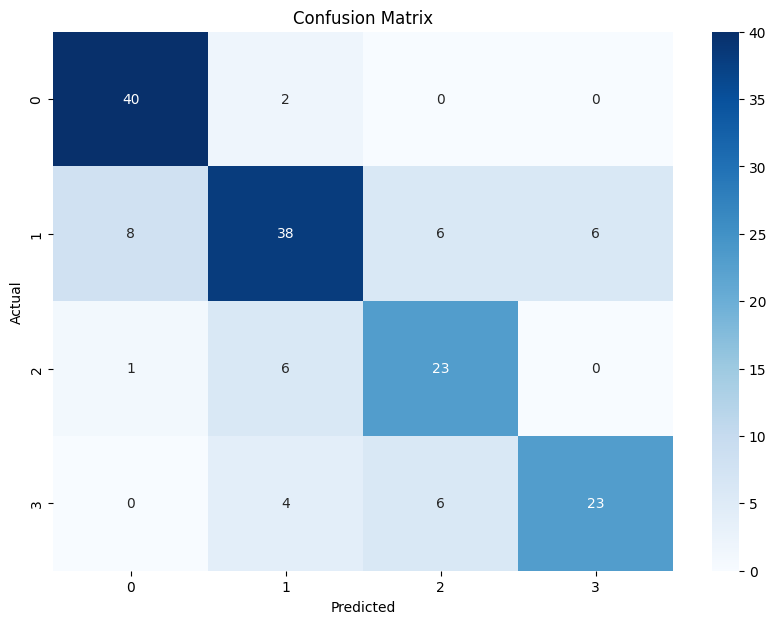

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_dtc)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [222]:
accuracy = accuracy_score(y_test, y_pred_dtc)
precision = precision_score(y_test, y_pred_dtc, average='macro')
recall = recall_score(y_test, y_pred_dtc, average='macro')
f1 = f1_score(y_test, y_pred_dtc, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.7607361963190185
Precision: 0.7566432090077411
Recall: 0.7677974324526049
F1-Score: 0.7581


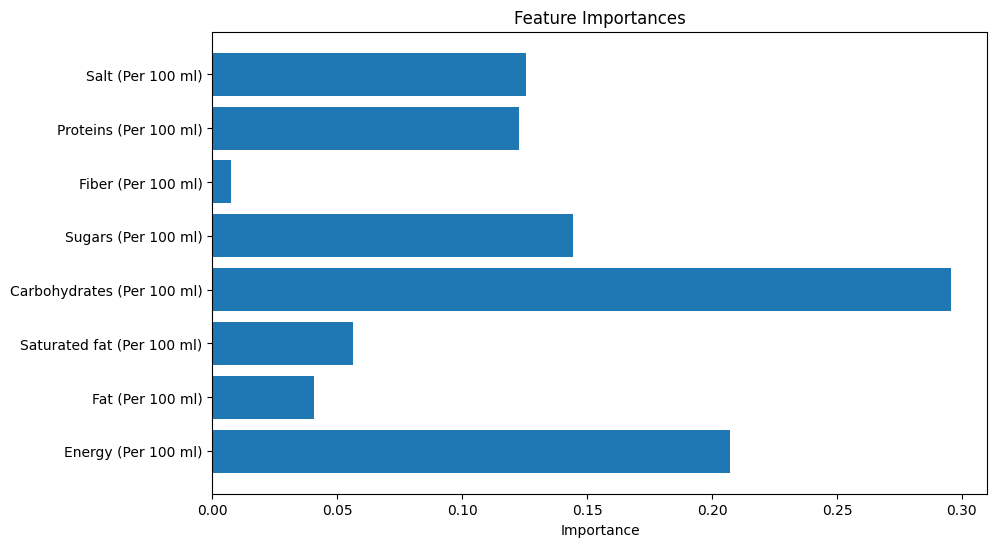

In [223]:
feature_importances = dtc_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(features_used, feature_importances, align='center')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

KNN
---

In [227]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

k_initial = 1

knn_model = KNeighborsClassifier(n_neighbors = k_initial)

knn_model.fit(X_train, y_train)

# predict
y_pred_knn = knn_model.predict(X_test)

# accuracy
knn_accuracy = round(accuracy_score(y_test, y_pred_knn), 4) * 100

print(f"Akurasi Model: {knn_accuracy}%")

cm = confusion_matrix(y_test, y_pred_knn)

Akurasi Model: 80.97999999999999%


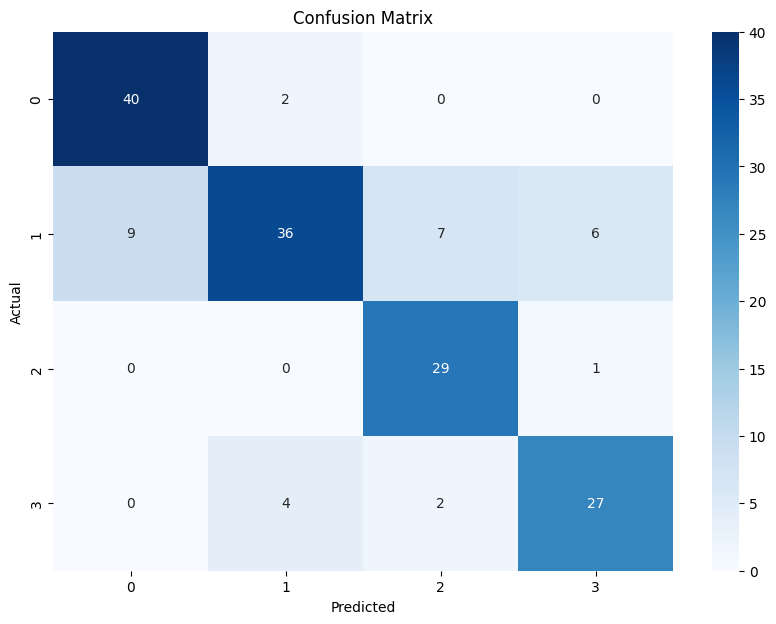

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [229]:
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='macro')
recall = recall_score(y_test, y_pred_knn, average='macro')
f1 = f1_score(y_test, y_pred_knn, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.8098159509202454
Precision: 0.8076862323876919
Recall: 0.8394797731004628
F1-Score: 0.8145


Random Forest
---

In [230]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

rf_model = RandomForestClassifier(criterion='gini', random_state=42, max_depth=19)
rf_model.fit(X_train, y_train)

# predict
y_pred_rf = rf_model.predict(X_test)

# accuracy
rf_accuracy = round(accuracy_score(y_test, y_pred_rf), 4) * 100
print(f"Akurasi Model: {rf_accuracy}%")

Akurasi Model: 84.66%


In [231]:
for i in [7,9,11,13,15,17,19,21]:
    check = RandomForestClassifier(criterion='gini',random_state=42, max_depth=i)
    check.fit(X_train, y_train)
    y_pred_check= check.predict(X_test)
    print(f"Akurasi max depth {i} = {accuracy_score(y_test,y_pred_check)}")

Akurasi max depth 7 = 0.7668711656441718
Akurasi max depth 9 = 0.803680981595092
Akurasi max depth 11 = 0.8220858895705522
Akurasi max depth 13 = 0.8282208588957055
Akurasi max depth 15 = 0.8343558282208589
Akurasi max depth 17 = 0.8404907975460123
Akurasi max depth 19 = 0.8466257668711656
Akurasi max depth 21 = 0.8282208588957055


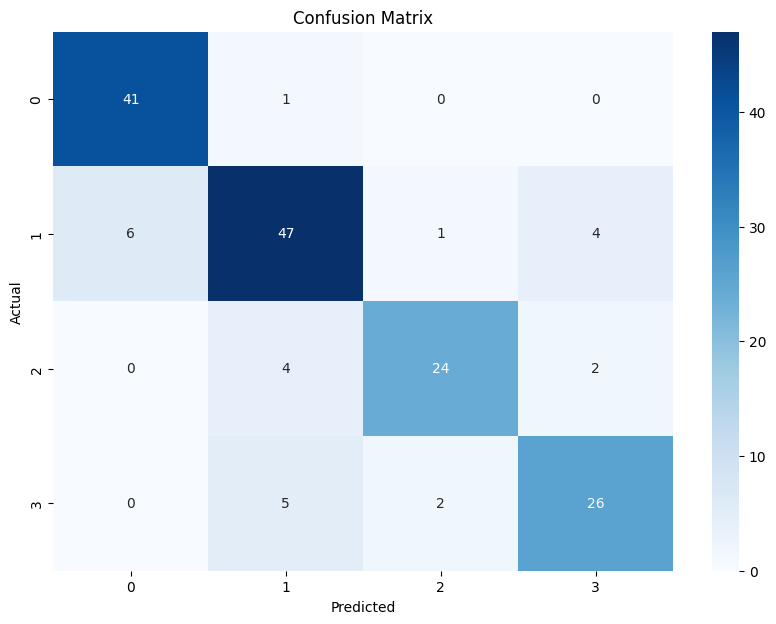

In [232]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [233]:
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='macro')
recall = recall_score(y_test, y_pred_rf, average='macro')
f1 = f1_score(y_test, y_pred_rf, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.8466257668711656
Precision: 0.8495726794823939
Recall: 0.8436035229138679
F1-Score: 0.8452


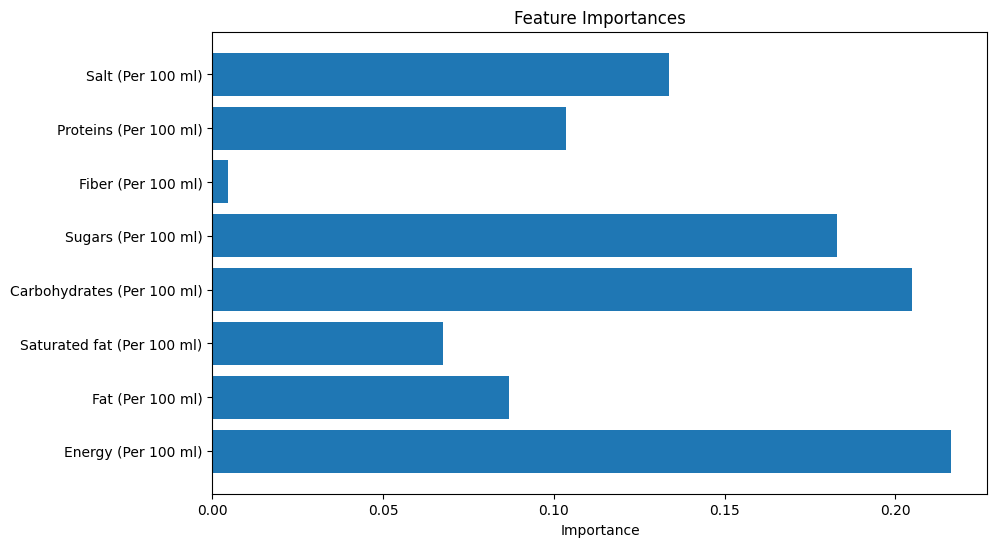

In [234]:
feature_importances = rf_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(features_used, feature_importances, align='center')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

XGBoost
---

In [235]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

xgb_model = XGBClassifier(random_state=42, max_depth=11)
xgb_model.fit(X_train, y_train)

# predict
y_pred_xgb = xgb_model.predict(X_test)

# accuracy
xgb_accuracy = round(accuracy_score(y_test, y_pred_xgb), 4) * 100
print(f"Akurasi Model: {xgb_accuracy}%")

Akurasi Model: 84.66%


In [236]:
for i in [7,9,11,13,15,17,19]:
    check = XGBClassifier(random_state=42, max_depth=i)
    check.fit(X_train, y_train)
    y_pred_check= check.predict(X_test)
    print(f"Akurasi max depth {i} = {accuracy_score(y_test,y_pred_check)}")

Akurasi max depth 7 = 0.8343558282208589
Akurasi max depth 9 = 0.8404907975460123
Akurasi max depth 11 = 0.8466257668711656
Akurasi max depth 13 = 0.8343558282208589
Akurasi max depth 15 = 0.8404907975460123
Akurasi max depth 17 = 0.8343558282208589
Akurasi max depth 19 = 0.8220858895705522


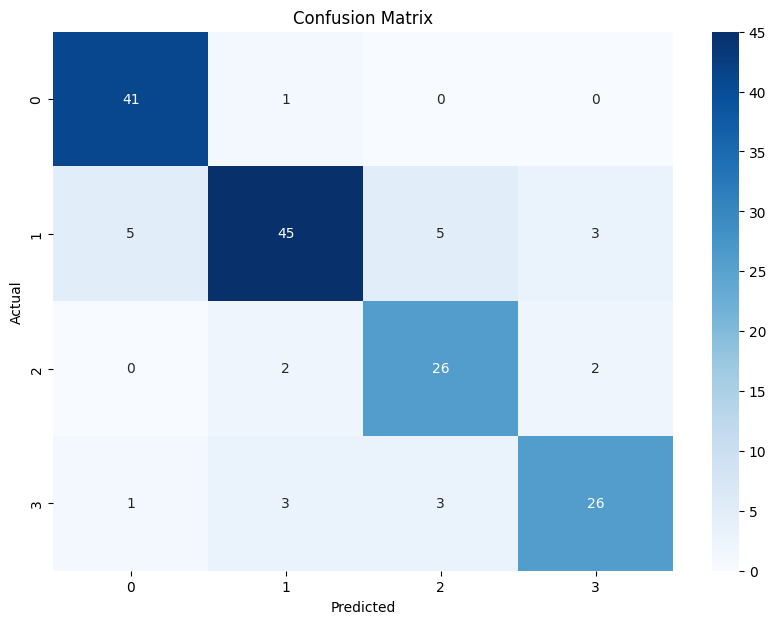

In [237]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [238]:
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb, average='macro')
recall = recall_score(y_test, y_pred_xgb, average='macro')
f1 = f1_score(y_test, y_pred_xgb, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.8466257668711656
Precision: 0.8395272316201704
Recall: 0.8516494999253621
F1-Score: 0.8430


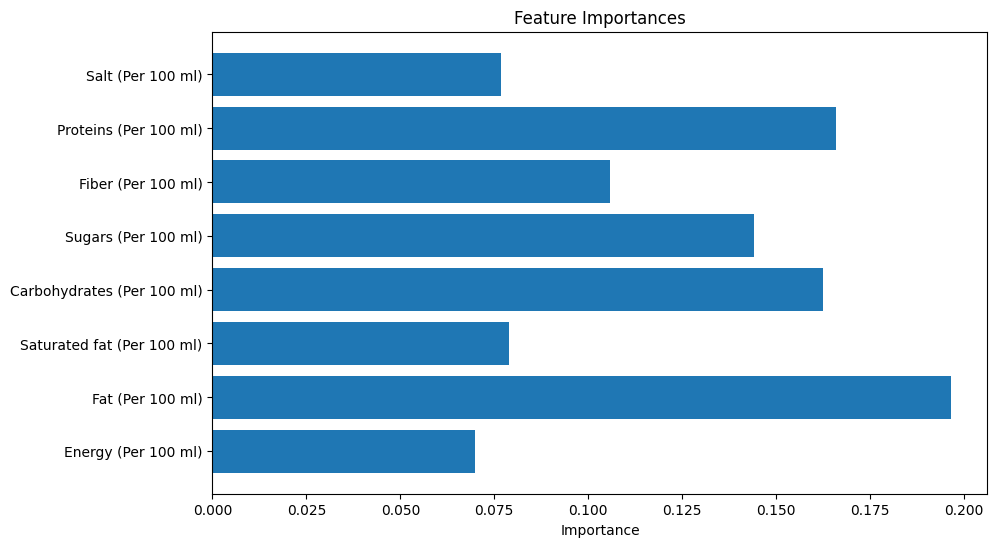

In [239]:
feature_importances = xgb_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(features_used, feature_importances, align='center')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

Logistic Regression
---

In [240]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

logreg_model = LogisticRegression(C=5, random_state=42, max_iter=1000)
logreg_model.fit(X_train, y_train)

# predict
y_pred_logreg = logreg_model.predict(X_test)

# accuracy
logreg_accuracy = round(accuracy_score(y_test, y_pred_logreg), 4) * 100
print(f"Akurasi Model: {logreg_accuracy}%")

Akurasi Model: 65.64%


In [241]:
for c in [1,3,5,7,9,11]:
    model = LogisticRegression(C=c, random_state=42, max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Akurasi C={c} = {acc}")

Akurasi C=1 = 0.6441717791411042
Akurasi C=3 = 0.6441717791411042
Akurasi C=5 = 0.656441717791411
Akurasi C=7 = 0.656441717791411
Akurasi C=9 = 0.656441717791411
Akurasi C=11 = 0.656441717791411


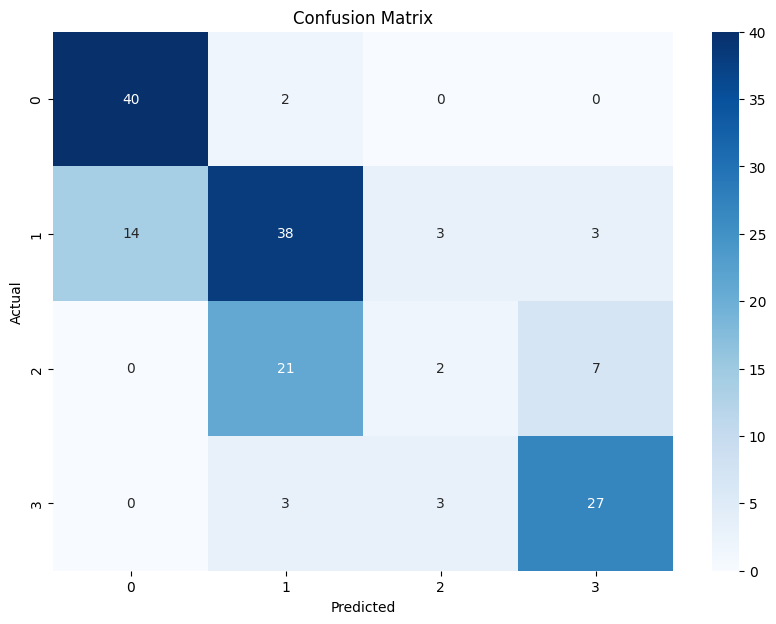

In [242]:
cm = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [243]:
accuracy = accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg, average='macro')
recall = recall_score(y_test, y_pred_logreg, average='macro')
f1 = f1_score(y_test, y_pred_logreg, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.656441717791411
Precision: 0.5785551176176176
Recall: 0.6231004627556351
F1-Score: 0.5832


Naive Bayes
---

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
z_scores = np.abs((X_train_scaled - X_train_scaled.mean(axis=0)) / X_train_scaled.std(axis=0))
mask = (z_scores < 3).all(axis=1)

X_train_filtered = X_train_scaled[mask]
y_train_filtered = y_train[mask]

In [ ]:
selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = selector.fit_transform(X_train_filtered, y_train_filtered)
X_test_selected = selector.transform(X_test_scaled)

In [ ]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_selected, y_train_filtered)


In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train_balanced, y_train_balanced)

y_pred_nb = nb_model.predict(X_test_selected)


In [ ]:

nb_accuracy = round(accuracy_score(y_test, y_pred_nb), 4) * 100
precision = precision_score(y_test, y_pred_nb, average='macro')
recall = recall_score(y_test, y_pred_nb, average='macro')
f1 = f1_score(y_test, y_pred_nb, average='macro')

print(f"Akurasi Model: {nb_accuracy}%")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1:.4f}")


print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_nb))

Akurasi Model: 61.35%
Precision: 0.6157978596503186
Recall: 0.6154426033736378
F1-Score: 0.5766

Classification Report:

              precision    recall  f1-score   support

           0       0.67      0.98      0.80        42
           1       0.68      0.43      0.53        58
           2       0.62      0.27      0.37        30
           3       0.50      0.79      0.61        33

    accuracy                           0.61       163
   macro avg       0.62      0.62      0.58       163
weighted avg       0.63      0.61      0.58       163



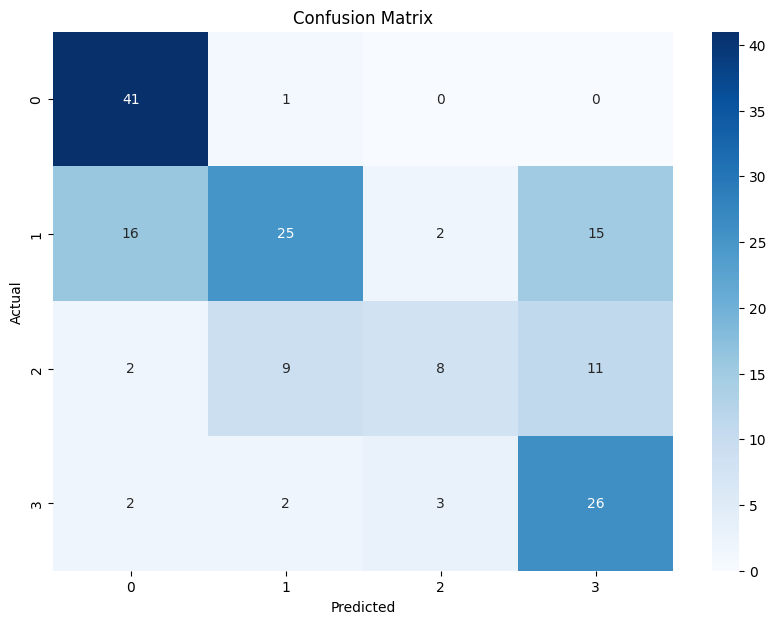

In [ ]:
cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Model Comparison
---

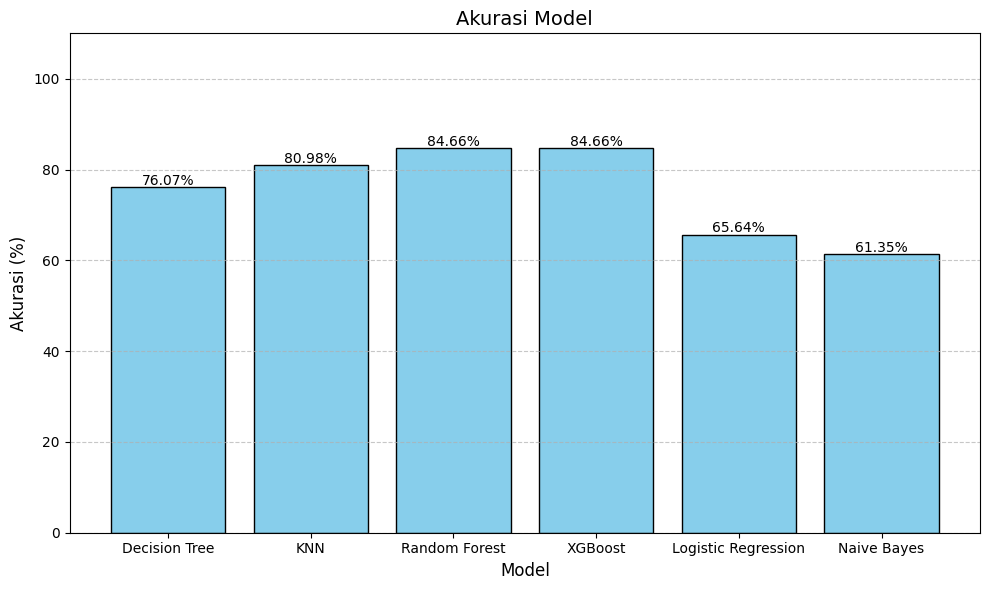

In [ ]:
import matplotlib.pyplot as plt

model_names = ['Decision Tree', 'KNN', 'Random Forest', 'XGBoost', 'Logistic Regression','Naive Bayes']
model_accuracies = [dt_accuracy, knn_accuracy, rf_accuracy, xgb_accuracy, logreg_accuracy, nb_accuracy]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, model_accuracies, color='skyblue', edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.2f}%', ha='center', fontsize=10)

plt.title('Akurasi Model', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Akurasi (%)', fontsize=12)
plt.ylim(0, 110)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Parameter Tuning
---

Decision Tree

In [244]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(3, 21)),
    'min_samples_split': [2, 5, 10]
}

dtc = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_model.predict(X_test)

dt_accuracy = round(accuracy_score(y_test, y_pred), 4) * 100
print(f"Parameter Terbaik: {best_params}")
print(f"Akurasi Model Terbaik: {dt_accuracy}%")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Parameter Terbaik: {'criterion': 'entropy', 'max_depth': 18, 'min_samples_split': 2}
Akurasi Model Terbaik: 79.75%
Confusion Matrix:
 [[38  4  0  0]
 [ 6 43  4  5]
 [ 0  3 26  1]
 [ 0  8  2 23]]
Precision: 0.7964425832259554
Recall: 0.7975460122699386
F1 Score: 0.7960824561968713


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': list(range(1, 21))}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
best_knn_model = grid_search.best_estimator_

y_pred_knn = best_knn_model.predict(X_test)

knn_accuracy = round(accuracy_score(y_test, y_pred_knn), 4) * 100
print(f"Best k (n_neighbors): {best_k}")
print(f"Akurasi Model Terbaik: {knn_accuracy}%")

cm = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", cm)

print("Precision:", precision_score(y_test, y_pred_knn, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_knn, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_knn, average='weighted'))

Best k (n_neighbors): 1
Akurasi Model Terbaik: 80.97999999999999%
Confusion Matrix:
 [[40  2  0  0]
 [ 9 36  7  6]
 [ 0  0 29  1]
 [ 0  4  2 27]]
Precision: 0.8165682159205302
Recall: 0.8098159509202454
F1 Score: 0.8028731726537897


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

param_grid = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred_rf = best_rf.predict(X_test)

rf_accuracy = round(accuracy_score(y_test, y_pred_rf), 4) * 100
print(f"Parameter Terbaik: {best_params}")
print(f"Akurasi Model Terbaik: {rf_accuracy}%")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))

Parameter Terbaik: {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
Akurasi Model Terbaik: 83.44%
Confusion Matrix:
 [[40  2  0  0]
 [ 6 46  3  3]
 [ 0  4 24  2]
 [ 0  5  2 26]]
Precision: 0.8333359646382189
Recall: 0.8343558282208589
F1 Score: 0.8331355695879457


XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

param_grid = {
    'max_depth': [3, 6, 9, 11],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 150, 200],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred_xgb = best_xgb.predict(X_test)

xgb_accuracy = round(accuracy_score(y_test, y_pred_xgb), 4) * 100
print(f"Parameter Terbaik: {best_params}")
print(f"Akurasi Model Terbaik: {xgb_accuracy}%")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_xgb, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_xgb, average='weighted'))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Parameter Terbaik: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
Akurasi Model Terbaik: 83.44%
Confusion Matrix:
 [[42  0  0  0]
 [ 6 44  5  3]
 [ 0  4 25  1]
 [ 1  5  2 25]]
Precision: 0.8345810997441433
Recall: 0.8343558282208589
F1 Score: 0.8316421126632881


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:10:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

param_grid = {
    'C': [0.01, 0.1, 1, 5, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 500, 1000]
}

logreg = LogisticRegression(random_state=42)

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_logreg = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred_logreg = best_logreg.predict(X_test)

logreg_accuracy = round(accuracy_score(y_test, y_pred_logreg), 4) * 100
print(f"Parameter Terbaik: {best_params}")
print(f"Akurasi Model Terbaik: {logreg_accuracy}%")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_logreg, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_logreg, average='weighted'))

Parameter Terbaik: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Akurasi Model Terbaik: 65.03%
Confusion Matrix:
 [[39  3  0  0]
 [15 39  0  4]
 [ 0 21  0  9]
 [ 0  5  0 28]]
Precision: 0.5284332796413492
Recall: 0.6503067484662577
F1 Score: 0.582838864280582


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

z_scores = np.abs((X_train_scaled - X_train_scaled.mean(axis=0)) / X_train_scaled.std(axis=0))
mask = (z_scores < 3).all(axis=1)
X_train_filtered = X_train_scaled[mask]
y_train_filtered = y_train[mask]

selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = selector.fit_transform(X_train_filtered, y_train_filtered)
X_test_selected = selector.transform(X_test_scaled)

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_selected, y_train_filtered)

param_grid = {
    'var_smoothing': np.logspace(-12, -6, 10)
}
grid = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_balanced, y_train_balanced)

best_model = grid.best_estimator_
print(f"Best var_smoothing: {grid.best_params_}")

y_pred = best_model.predict(X_test_selected)

accuracy = round(accuracy_score(y_test, y_pred), 4) * 100
print(f"Akurasi Model Terbaik: {accuracy}%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


Best var_smoothing: {'var_smoothing': np.float64(1e-12)}
Akurasi Model Terbaik: 61.35%
Confusion Matrix:
 [[41  1  0  0]
 [16 25  2 15]
 [ 2  9  8 11]
 [ 2  2  3 26]]
Precision: 0.6280996064260672
Recall: 0.6134969325153374
F1 Score: 0.5847499078843512


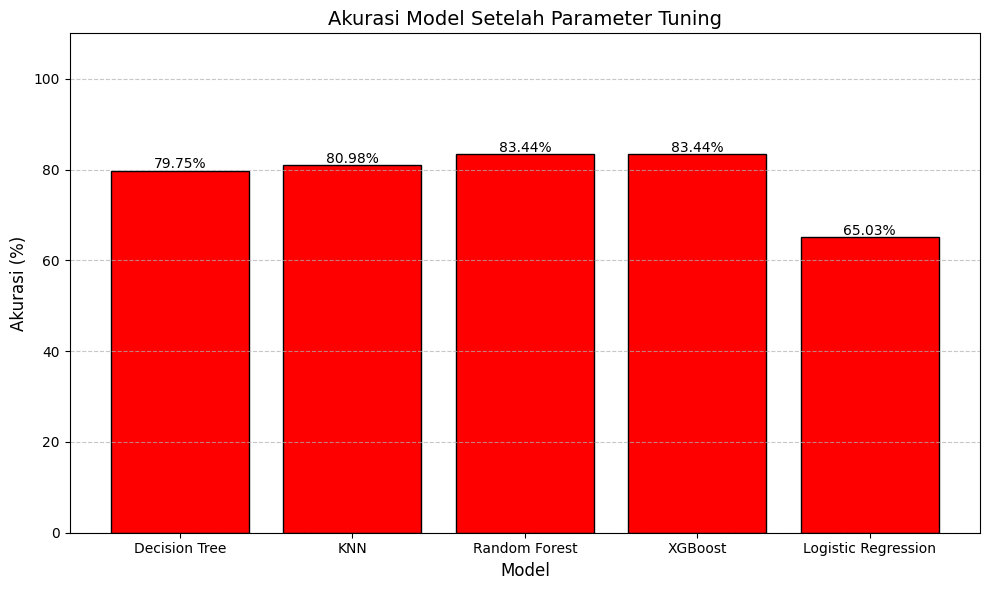

In [ ]:
import matplotlib.pyplot as plt

model_names = ['Decision Tree', 'KNN', 'Random Forest', 'XGBoost', 'Logistic Regression', 'Naive Bayes']
model_accuracies = [dt_accuracy, knn_accuracy, rf_accuracy, xgb_accuracy, logreg_accuracy]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, model_accuracies, color='red', edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.2f}%', ha='center', fontsize=10)

plt.title('Akurasi Model Setelah Parameter Tuning', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Akurasi (%)', fontsize=12)
plt.ylim(0, 110)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()